In [154]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
mgd = pd.read_csv("../data/MDG_Export_20191227.csv")
mgd.head()



,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


In [122]:
len(mgd['Country'].unique())



230

In [123]:
real = mgd.set_index('Country').isna().sum(axis=1)
real.groupby(['Country']).sum()

Country
Afghanistan                                       29
Albania                                           29
Algeria                                           29
American Samoa                                     7
Andorra                                           24
                                                  ..
Western Sahara                                     7
Yemen                                             29
Yugoslavia [former Socialist Federal Republic]     2
Zambia                                            29
Zimbabwe                                          29
Length: 230, dtype: int64

In [124]:
nul_ser = mgd.set_index('Series').isna().sum(axis=1)
nul_ser.groupby(['Series']).sum()

Series
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             4575
Proportion of land area covered by forest, percentage                            880
Terrestrial and marine areas protected to total territorial area, percentage     669
dtype: int64

In [125]:

year = np.arange(start=1990, stop=2020, step=1)

ew = []
for y in year:
    ew.append (mgd[str(y)].isnull().sum())

tot = np.array(ew)
dataset = pd.DataFrame({'year': year, 'total': list(tot)}, columns=['year','total'])

print(dataset)


    year  total
0   1990      1
1   1991      0
2   1992      0
3   1993      0
4   1994      0
5   1995      0
6   1996      0
7   1997      0
8   1998      0
9   1999      0
10  2000      1
11  2001      0
12  2002      0
13  2003      0
14  2004      0
15  2005      1
16  2006      0
17  2007      0
18  2008      0
19  2009      0
20  2010      1
21  2011      0
22  2012      0
23  2013      0
24  2014      0
25  2015      0
26  2016      0
27  2017      0
28  2018      0
29  2019      0


In [126]:

#mgd.replace(" ",0,inplace=True)
for y in year:
    mgd[str(y)] = pd.to_numeric(mgd[str(y)], errors='coerce')

#for col in df.columns:
    #if 'spike' in col
mgd.drop(columns = mgd.columns[mgd.columns.str.contains(pat = 'Footnotes')],inplace=True)
mgd.drop(columns = mgd.columns[mgd.columns.str.contains(pat = 'Type')],inplace=True)

#np.sort(mgd['1990'])
Top_em = mgd.sort_values(by='1990',ascending=False).head()
Top_em[['Country','1990','2011']]

,Country,1990,2011
652,United States,4823557.1,5305569.6
124,China,2460744.0,9019518.2
301,Japan,1094287.8,1187657.0
277,India,690576.8,2074344.9
646,United Kingdom,555902.5,448235.7


In [127]:
carb = mgd.loc[mgd['Series'] == "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)"]
low_em = carb.sort_values(by='1990').head()
low_em[['Country','1990','2011']]

,Country,1990,2011
679,Yemen,-2999.6,22295.4
445,Niue,3.7,11.0
505,Saint Helena,7.3,11.0
559,Somalia,18.3,575.7
142,Cook Islands,22.0,69.7


In [128]:

carb['1990'].median()

3017.9

In [129]:
carb['1990'].mean()

91045.00331491708

In [130]:
carb['1990'].min()

-2999.6

In [131]:
carb['1990'].max()

4823557.1

In [132]:
carb['1990'].quantile()

3017.9

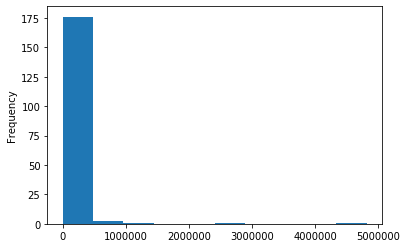

In [133]:
#carb_90=pd.DataFrame(carb)
#carb_90.dropna(subset = ["1990"],inplace=True)
#ax = carb_90['1990'].plot.hist()

ax = carb['1990'].plot.hist()



In [134]:
carb['1990'].std()

416748.0255920677

In [135]:
carb['1990'].sem()

30976.63678826482

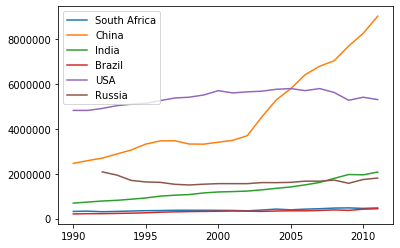

In [136]:

carb_SA =carb.loc[carb['Country'] == 'South Africa']
carb_ch =carb.loc[carb['Country'] == 'China']
carb_us =carb.loc[carb['Country'] == 'United States']
carb_in =carb.loc[carb['Country'] == 'India']
carb_rus =carb.loc[carb['Country'] == 'Russian Federation']
carb_br =carb.loc[carb['Country'] == 'Brazil']
count = pd.DataFrame()


SA= (carb_SA.iloc[:, 5:34]).iloc[0]
china= (carb_ch.iloc[:, 5:34]).iloc[0]
usa= (carb_us.iloc[:, 5:34]).iloc[0]
india= (carb_in.iloc[:, 5:34]).iloc[0]
russia = (carb_rus.iloc[:, 5:34]).iloc[0]
brazil = (carb_br.iloc[:, 5:34]).iloc[0]


room= pd.concat([SA, china,india,brazil,usa,russia], axis=1)
room.plot.line()
plt.legend(['South Africa', 'China','India','Brazil','USA','Russia'])

In [137]:
land_f = mgd.loc[mgd['Series'] == "Proportion of land area covered by forest, percentage"]
land_f['1990'].mean()
print(land_f['2000'])

0       2.1
3      28.1
6       0.7
9      90.0
12     35.6
       ... 
675     2.7
678     1.0
681     NaN
684    68.8
687    48.8
Name: 2000, Length: 230, dtype: float64


In [79]:
land_f['1990'].std()

25.497512099375246

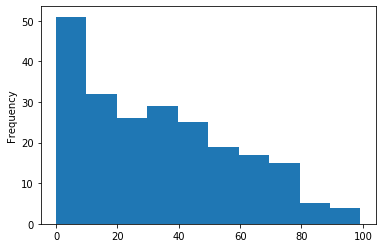

In [80]:
ax = land_f['1990'].plot.hist()

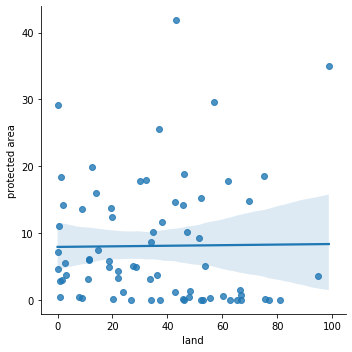

In [143]:
protected_area = mgd.loc[mgd['Series'] == "Terrestrial and marine areas protected to total territorial area, percentage"]
#protected_area.reset_index(inplace=True)
#land_f.reset_index(inplace=True)
#rel = pd.concat([land_f['2000'],protected_area['2000']],axis=1,keys=['land area', 'protected'])
rel = pd.DataFrame()
rel['protected area'] = protected_area['2000']
rel['land'] = land_f['2000']

sns.lmplot('land','protected area' ,data=rel)


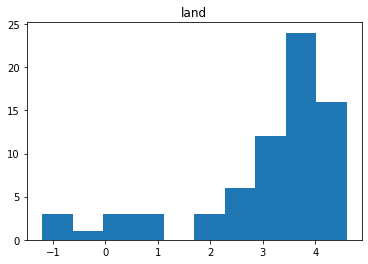

In [166]:

norm_land = np.log(rel['land'])
norm_area = np.log(rel['protected area'])
plt.hist(norm_land[np.isfinite(norm_land)].values)
new_land = norm_land[np.isfinite(norm_land)].values
numb =len(new_land)
#plt.hist(norm_land) 
plt.title("land") 
plt.show()

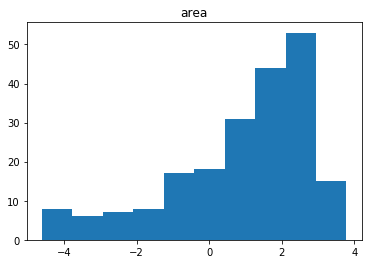

In [169]:
plt.hist(norm_area[np.isfinite(norm_area)].values)
old =norm_area[np.isfinite(norm_area)].values
new_area = old[:numb]
plt.title("area") 
plt.show()

In [170]:
pearsonr_coefficient, p_value =pearsonr(new_land,new_area)

print(pearsonr_coefficient)

0.19616565015580983
